In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [42]:
from bs4 import BeautifulSoup
import requests

In [43]:
res = requests.get("https://en.wikipedia.org/wiki/ISO_3166-1_numeric#Officially_assigned_code_elements")
soup = BeautifulSoup(res.content,'xml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

df = df.drop(0)

df.iloc[0][0] = "004"
df.columns = ["Code", "Country"]

In [44]:
df.head()

,Code,Country
1,004,Afghanistan
2,008,Albania
3,010,Antarctica
4,012,Algeria
5,016,American Samoa


In [45]:
df = df.reset_index()
df.head(), df.shape

(   index Code         Country
 0      1  004     Afghanistan
 1      2  008         Albania
 2      3  010      Antarctica
 3      4  012         Algeria
 4      5  016  American Samoa, (249, 3))

In [46]:
df.head(), df.shape

(   index Code         Country
 0      1  004     Afghanistan
 1      2  008         Albania
 2      3  010      Antarctica
 3      4  012         Algeria
 4      5  016  American Samoa, (249, 3))

In [47]:
data = pd.read_csv('data/cpj.csv')
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n


In [48]:
countries = list(data['Country_killed'])

In [49]:
df_country = df.Country
df_codes = df.Code

codes_dict = dict(zip(df_country, df_codes))

In [50]:
codes_column = []
empty_countries = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column.append(code)

In [51]:
list(set(empty_countries))

[nan,
 'Bosnia',
 'Vietnam',
 'Iran',
 'Tanzania',
 'Israel and the Occupied Palestinian Territory',
 'Democratic Republic of the Congo',
 'Venezuela',
 'Yugoslavia',
 'Ivory Coast',
 'Syria',
 'USA',
 'East Timor',
 'Russia',
 'Republic of Congo',
 'UK',
 'Bolivia']

In [52]:
codes_dict['Russian Federation']

'643'

In [53]:
missing_countries = list(set(empty_countries))
missing_codes = [np.nan, 70, 714, 364, 834, 376, 180, 862, 890, 384, 760, 840, 626, 643, 178, 826, 68]

In [54]:
len(missing_codes) == len(missing_countries)

True

In [55]:
for i in range(len(missing_countries)):
    codes_dict[missing_countries[i]] = missing_codes[i]

In [56]:
codes_column_2 = []
empty_countries_2 = []
for c in countries:
    code = codes_dict.get(c, None)
    if not code:
        empty_countries.append(c)
    codes_column_2.append(code)

In [57]:
codes_dict['USA'] , codes_dict['East Timor'] , codes_dict['United States of America'] , 

(840, 626, '840')

In [58]:
len(codes_column_2)== data.shape[0]

True

In [59]:
data['Country_code'] = codes_column_2

In [60]:
data.head()

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,Country_code
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,368
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,368
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n,434
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n,368
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No\n,586


In [61]:
country_counts_df = data.groupby('Country_killed').count()

final_country_counts = []
final_country_names = country_counts_df.index.values
final_country_codes = []
for i in range(country_counts_df.shape[0]):
    code = codes_dict[final_country_names[i]]
    final_country_codes.append(code)
    
    count = max(country_counts_df.iloc[i])
    final_country_counts.append(count)

In [62]:
final_counts_df = pd.DataFrame()
final_counts_df['Country'] = final_country_names
final_counts_df['Code'] = final_country_codes
final_counts_df['Count'] = final_country_counts

final_counts_df.head()

,Country,Code,Count
0,Afghanistan,004,36
1,Algeria,012,61
2,Angola,024,11
3,Argentina,032,4
4,Armenia,051,1


In [63]:
from vega_datasets import data as data_vega

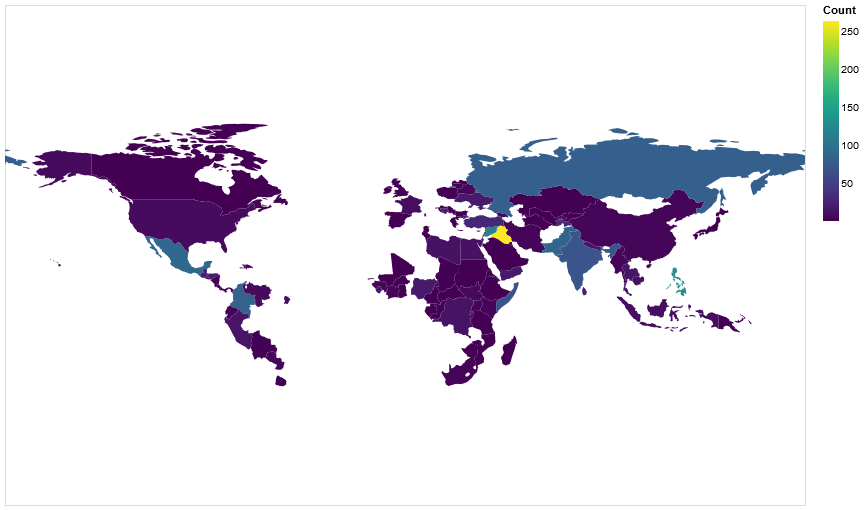

In [97]:
countries = alt.topo_feature(data_vega.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape().project(
    type='equirectangular'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(final_counts_df, 'Code', ['Count','Country','Code'])
).encode(
    color='Count:Q',
    tooltip=['Country:N','Code:N','Count:Q']
).properties(
    width=800,
    height=500,
)

In [65]:
data[data.Country_killed=='East Timor']

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured,Country_code
898,Motive Confirmed,"September 25, 1999",Agus Muliawan,Male,East Timor,Asia Press International,East Timor,Print,Print Reporter,War,No,Local,Paramilitary Group,Dangerous Assignment,NaN,No,No,No\n,626
899,Motive Confirmed,"September 21, 1999",Sander Thoenes,Male,East Timor,Freelancer,The Netherlands,Print,Print Reporter,War,Yes,Foreign,Military Officials,Murder,Yes,No,No,Yes\n,626


In [69]:
df.head()

,index,Code,Country
0,1,004,Afghanistan
1,2,008,Albania
2,3,010,Antarctica
3,4,012,Algeria
4,5,016,American Samoa


In [70]:
final_counts_df.head()

,Country,Code,Count
0,Afghanistan,004,36
1,Algeria,012,61
2,Angola,024,11
3,Argentina,032,4
4,Armenia,051,1


In [84]:
result = pd.merge(df, final_counts_df, on = 'Code', how='left')

In [75]:
df.shape

(249, 3)

In [76]:
final_counts_df.shape

(104, 3)

In [82]:
result.shape

(249, 5)

In [89]:
result.drop('Country_y',inplace=True, axis=1)

In [92]:
result = result.fillna(0)

In [99]:
result.columns = ['index', 'Code', 'Country', 'Count']

In [107]:
result['Code'] = result['Code'].astype(int)

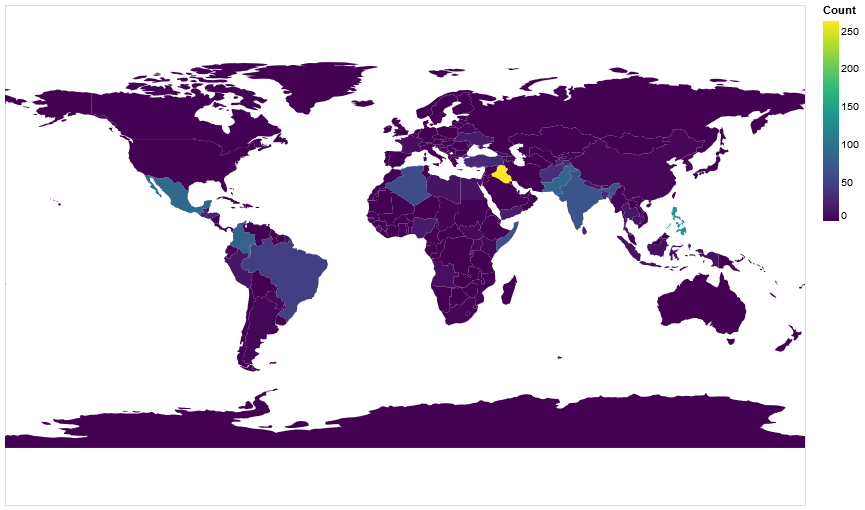

In [108]:
countries = alt.topo_feature(data_vega.world_110m.url, 'countries')

alt.Chart(countries).mark_geoshape().project(
    type='equirectangular'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(result, 'Code', ['Count','Country','Code'])
).encode(
    color='Count:Q',
    tooltip=['Country:N','Code:N','Count:Q']
).properties(
    width=800,
    height=500,
)